<a href="https://colab.research.google.com/github/Lillyvettee/DataProfolio/blob/main/Lillyvette_ReCell_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell 

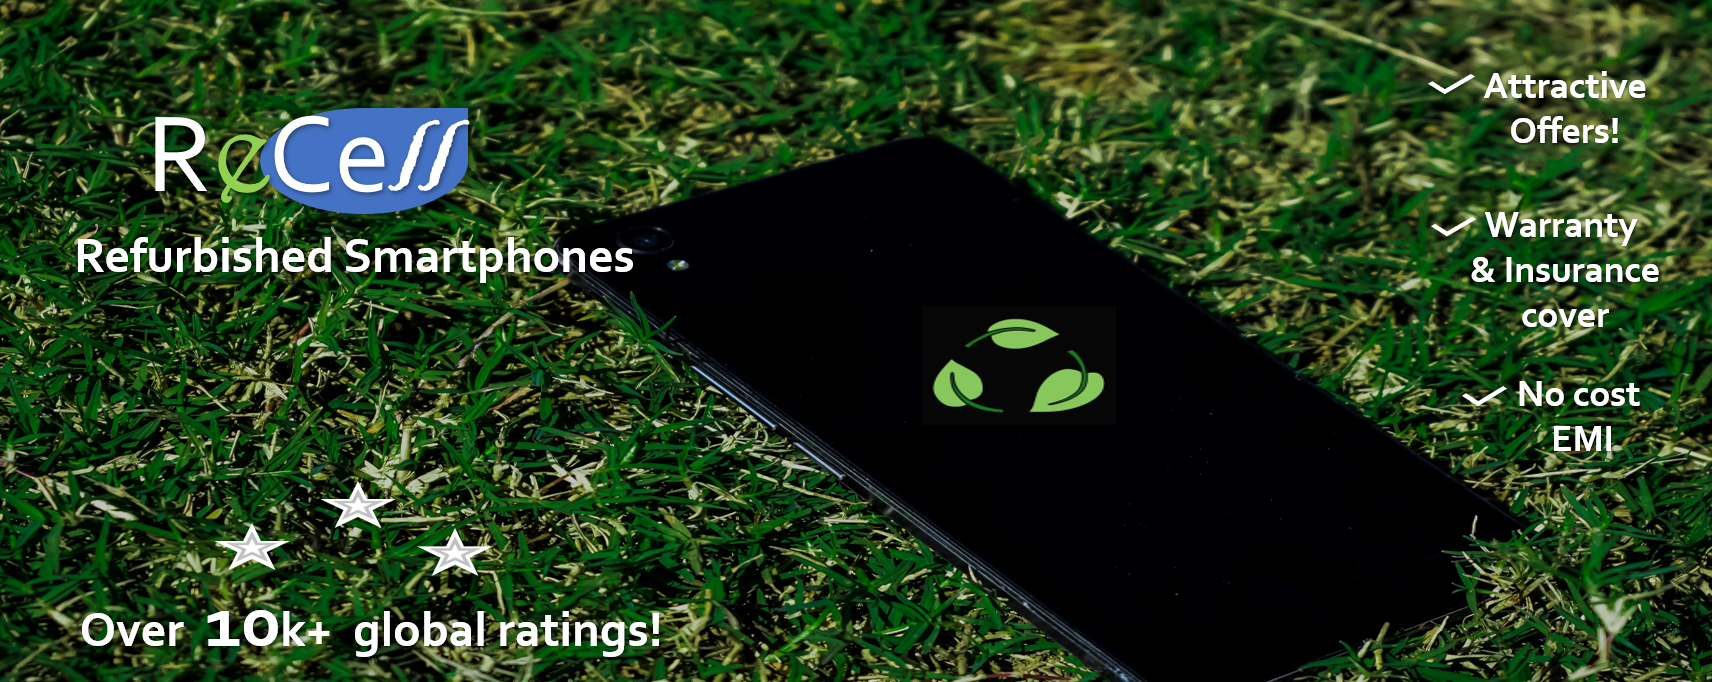

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [8]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [9]:
#connects with Google Collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Connects the data and calls the data, data
data = pd.read_csv('/content/drive/MyDrive/GreatLearning/SupervisedLearning/SupervisedLearning-Foundations/Project/used_device_data.csv')

## Data Overview

In [11]:
#Displays the first few rows of the data sheet
#looks like most brand names is honor
#Looks like all phones on list have 4g and main camera mp is 13

data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [12]:
#Checking the shape of the dataset
#The data has 15 attributes and 3454 phones
data.shape

(3454, 15)

### Checking the data types of the columns for the dataset

In [13]:
# There is 4 String types (Object type) and 11 numeric (float and int type) 
#columns in the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Statistical summary of the dataset

In [14]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0




*   We can see that the realse year of the devices are from 2013 - 2020
*  There is 34 unique brands of phone devices
*   The top OS for the devices is Andriod with the total of 4 unique OS






### Checking for duplicate values


In [15]:
data.duplicated().sum()

0



*   There are no duplicate values in the data



### Checking for missing values


In [16]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64



*   There is 6 columns with some missing values 








In [17]:
# Creating a copy of the data so the orginal data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

 ### Univariate Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Normalized_used_price

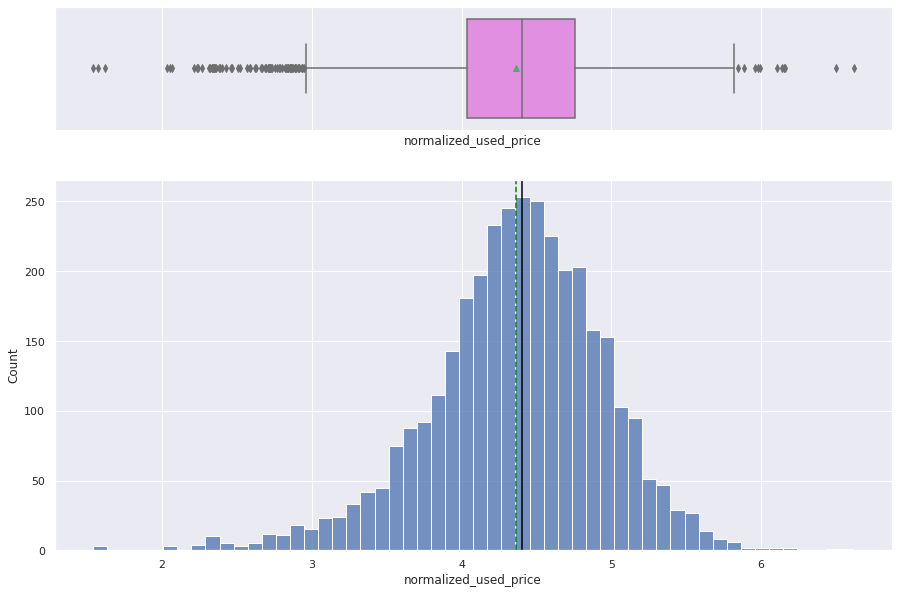

In [20]:
#The mean is 4.5
#The upper quartile is almost 5
# The lower quartile is around 3

histogram_boxplot(df, "normalized_used_price")

normalized_new_price

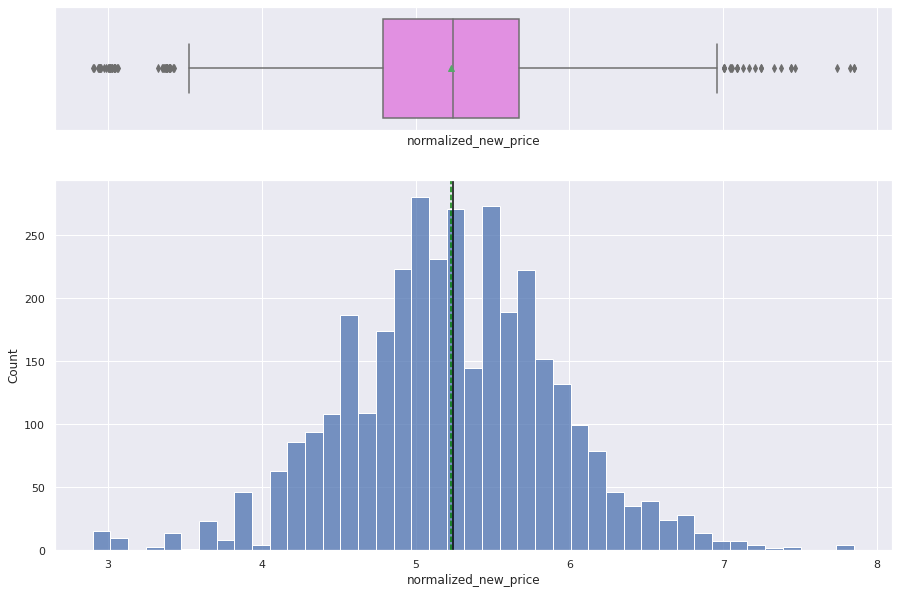

In [21]:
#The mean is around 5
#The upper quartile is almost 6
# The lower quartile is around 5
histogram_boxplot(df, "normalized_new_price")

screen_size

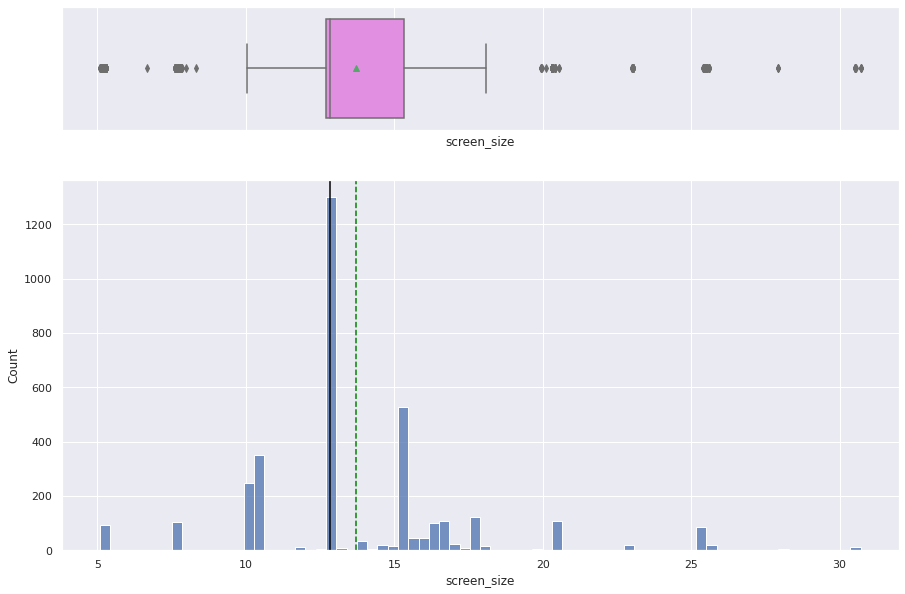

In [22]:
#the medium of screen size is 9
histogram_boxplot(df, "screen_size")

main_camera_mp

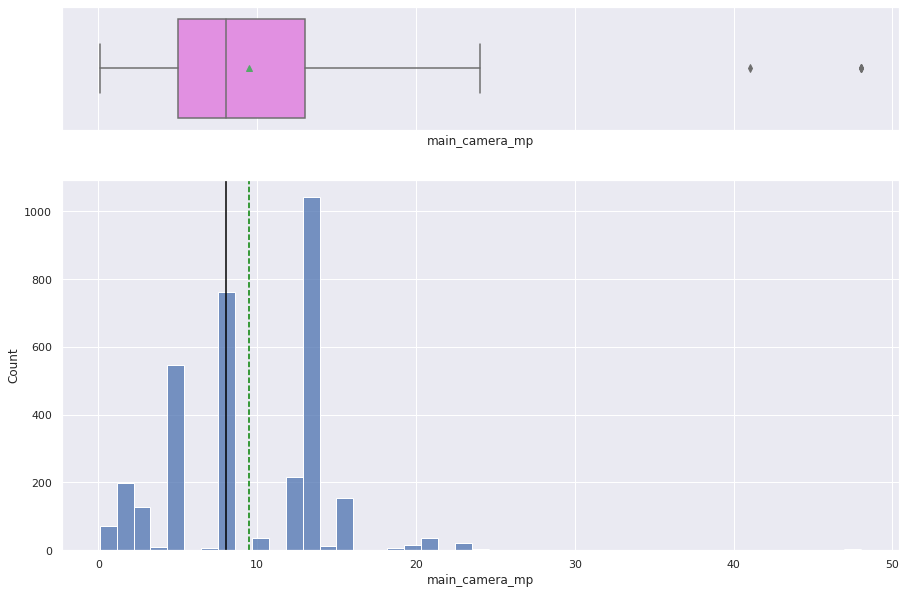

In [23]:
#the main camera MP meadium is 9
histogram_boxplot(df, "main_camera_mp")

salfie_camera_mp

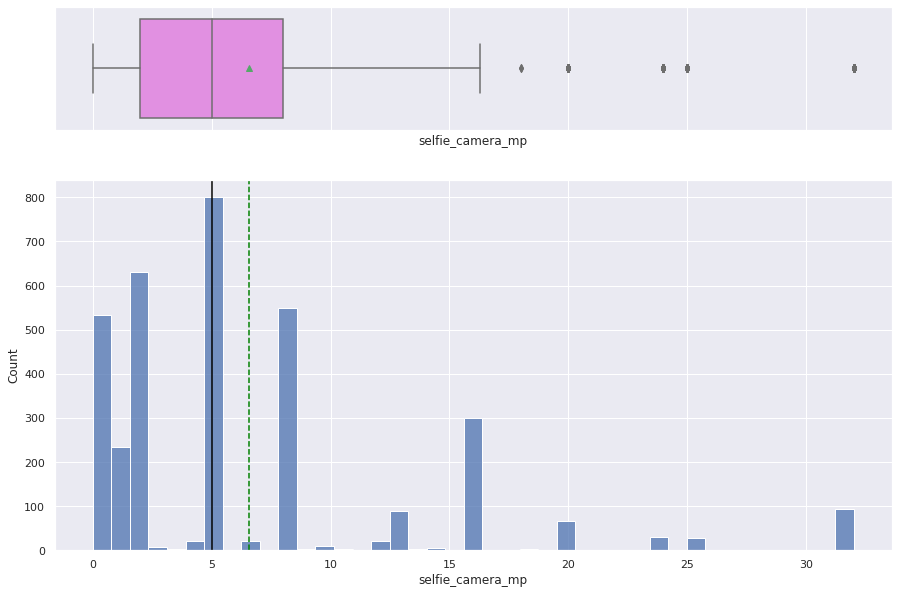

In [24]:
#most phones have 5 MP selfie camera 
histogram_boxplot(df, "selfie_camera_mp")

int_memory

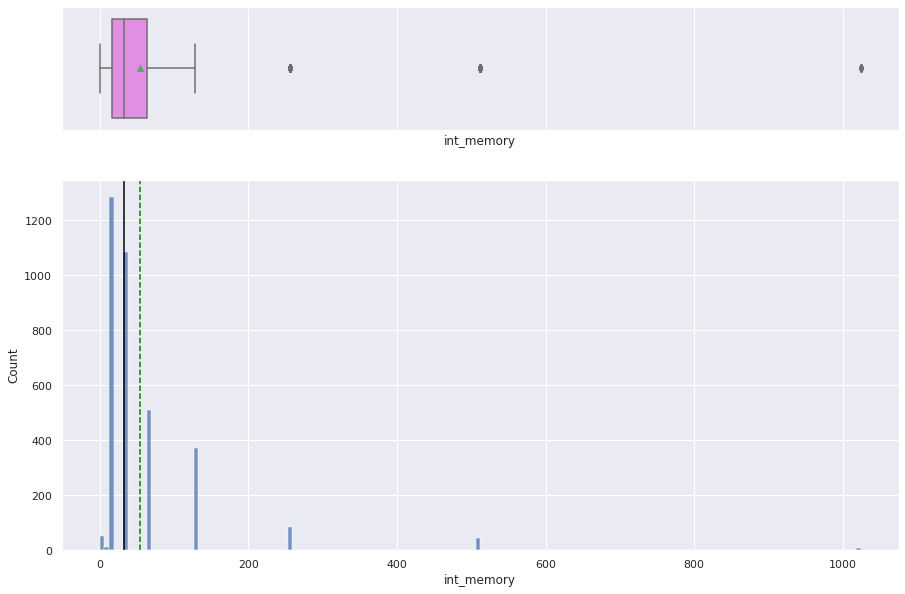

In [25]:
histogram_boxplot(df, "int_memory")

ram

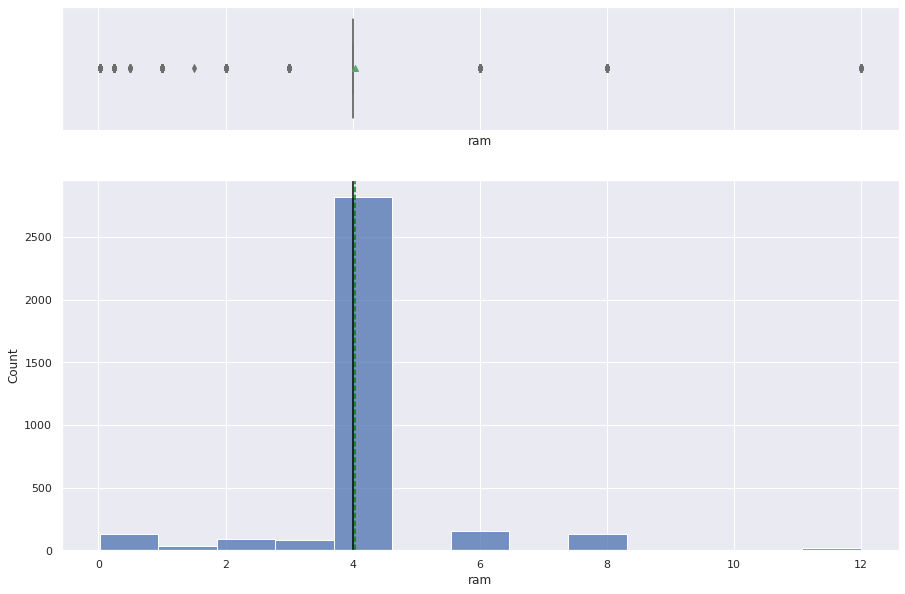

In [26]:
#most phones run of 4 ram
histogram_boxplot(df, "ram")

weight

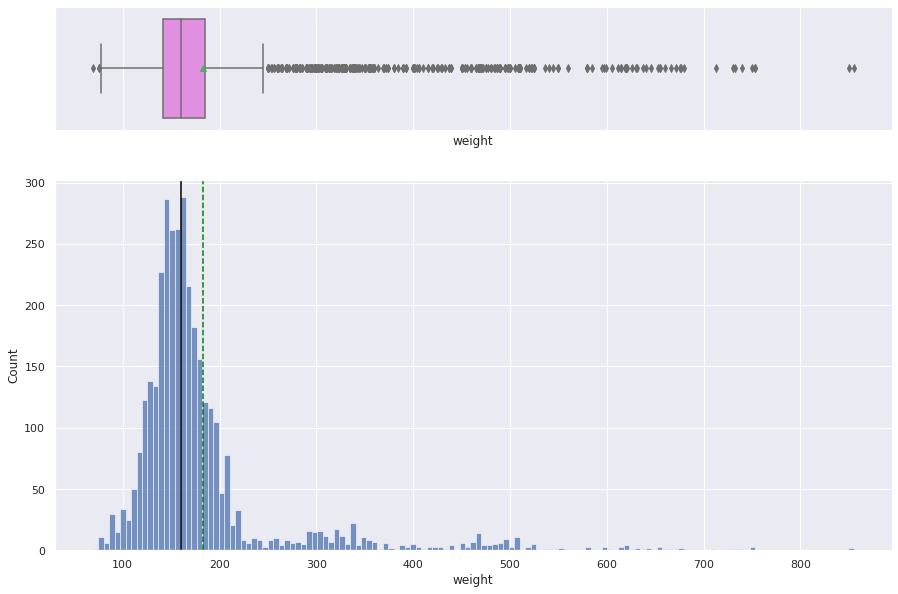

In [27]:
histogram_boxplot(df, "weight")

battery

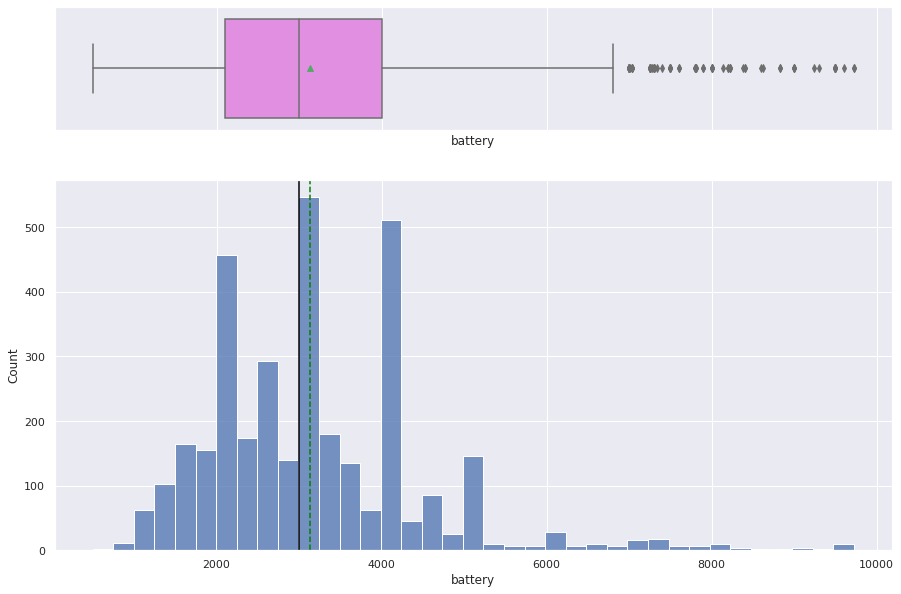

In [28]:
histogram_boxplot(df, "battery")

days_used

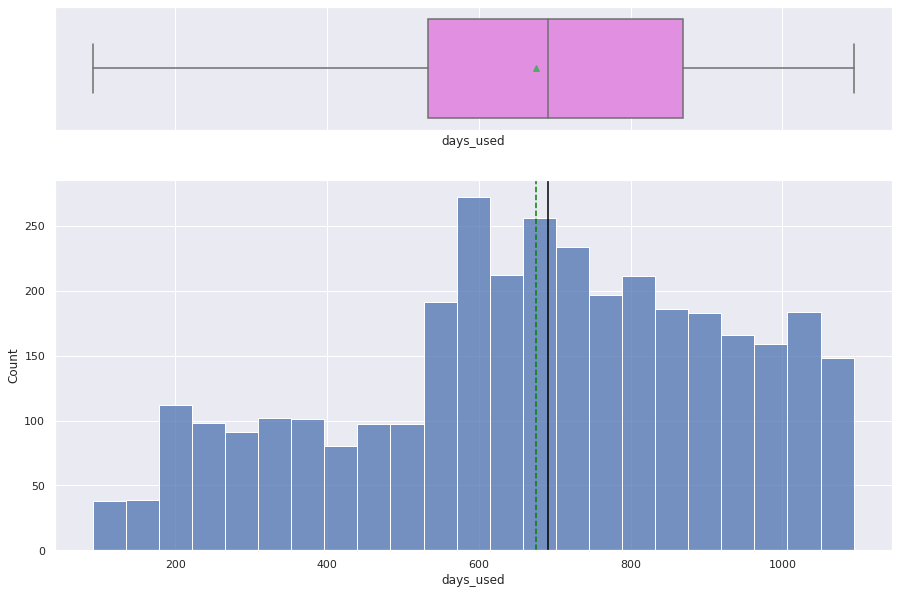

In [29]:
#The mean of the days the phone been used is arounf 700 with a low quartile of 550 
# and a high quartile of 830
histogram_boxplot(df, "days_used")

brand_name

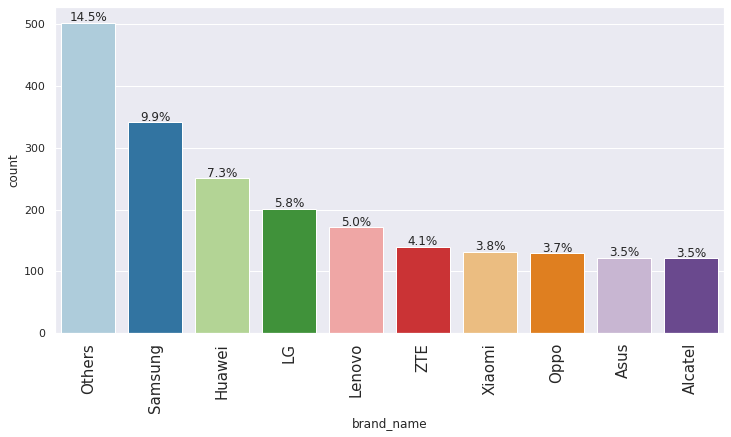

In [30]:
#The most brand named phones are on the other catergory 
labeled_barplot(df, "brand_name", perc=True, n=10)

os

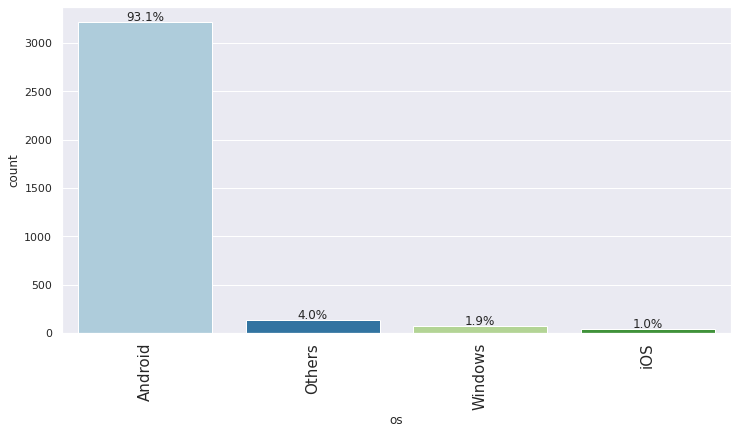

In [31]:
#Most phones OS is andriod
labeled_barplot(df, "os", perc=True, n=10)

4g

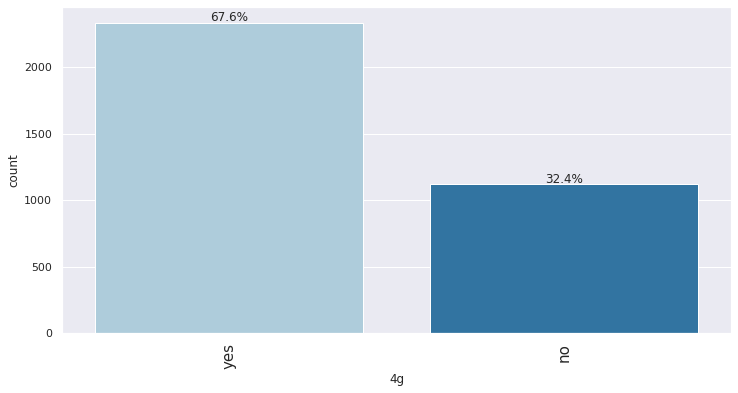

In [32]:
#Most phones offer 4G
labeled_barplot(df, "4g", perc=True, n=10)

5g

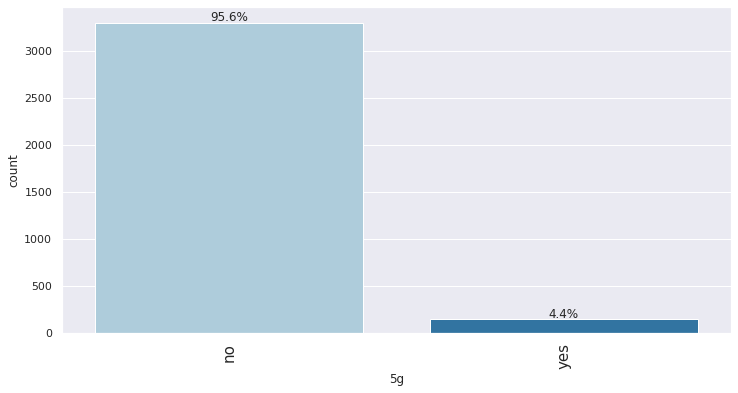

In [33]:
#most phones do not offer 5G
labeled_barplot(df, "5g", perc=True, n=10)

release_year

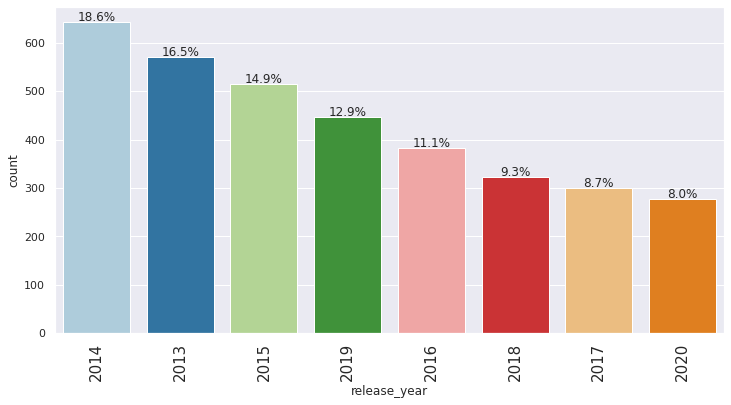

In [34]:
#there is 18.6 percent of devices that were realsed on 2014 and 8 percent in 2020
labeled_barplot(df, "release_year", perc=True, n=10)

### Bivariate Analysis

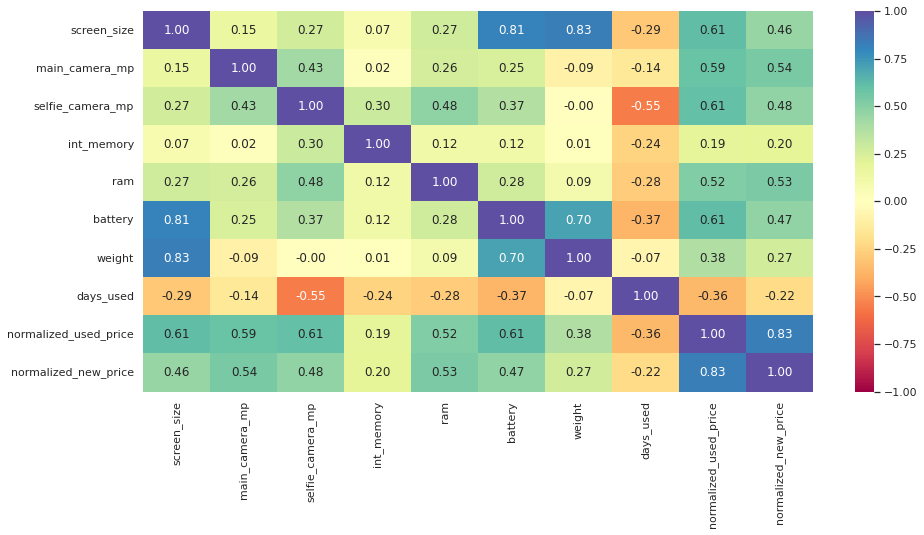

In [35]:
# dropping release_year as it is a temporal variable
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#	Battery, Selfie camera MP ,main camera MP and screen 
#size are highly correlated with the normalized price of a used device

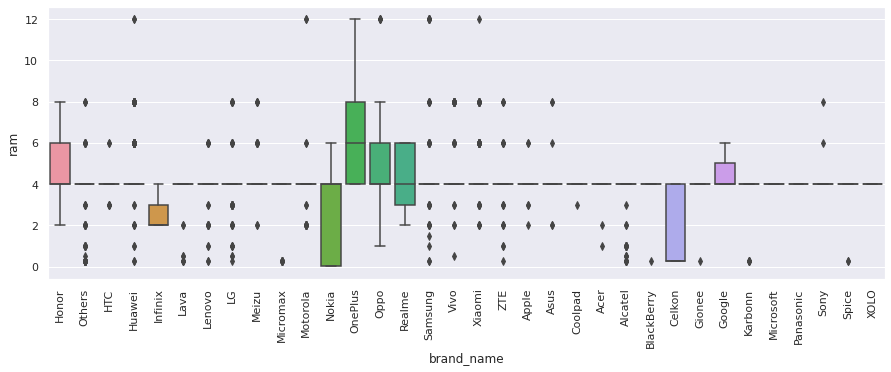

In [36]:
#checking the RAM across all brands
#seems like the medium is four with a few outliers 
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [37]:
#Battery is important but also the bigger the battery the increase of weight 
#341 of the betteries are large
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

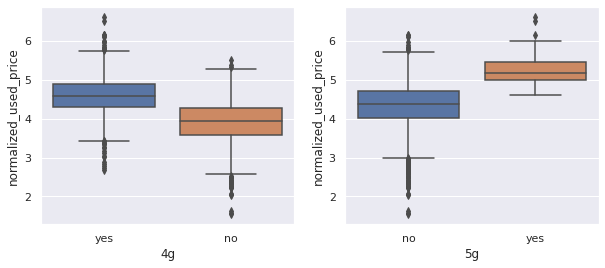

In [38]:
#Price check of phones offering 5G and 4 G
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

In [39]:
#How many cameras have a good selfie camera
#655 have good selfie cameras
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

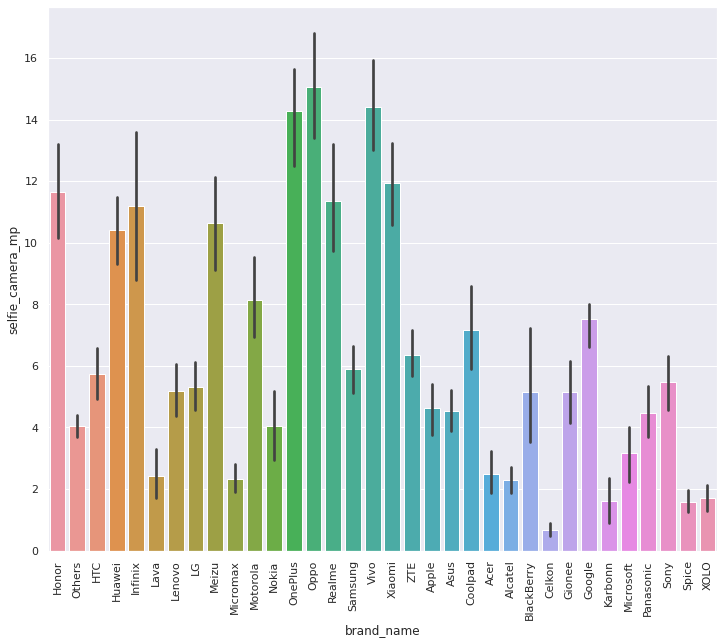

In [40]:
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
sns.barplot(data =  df, x='brand_name',y="selfie_camera_mp") 
#Oppo has the best selfie camera

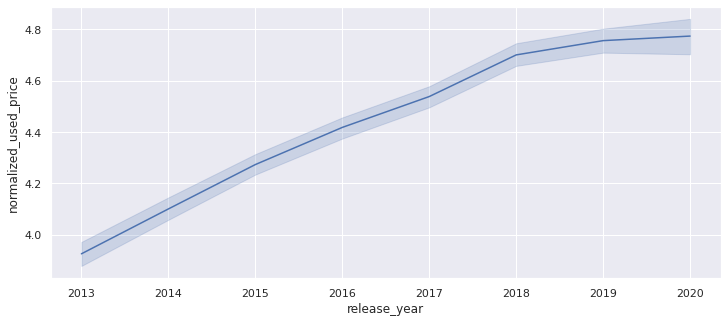

In [41]:
# Checks to see if prices of used devices across the years
#the prices increased
plt.figure(figsize=(12, 5))
sns.lineplot(data = df , x=  'release_year' , y = "normalized_used_price")
plt.show()

In [42]:
#Checks how many screens are large
#there is 1099 large screened phones
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Imputation


In [43]:
# Coping the data to avoid changes to it
df1 = df.copy()

In [44]:
#Checking for mising values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [45]:
#imputing the main camera with the median of camera
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

In [46]:
#check for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         2
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [47]:
#imputing the selfie_camera_mp with the median of selfie_camera_mp
df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(df1["selfie_camera_mp"].median())

In [48]:
#check for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [49]:
#imputing the int_memory with the median of int_memory
df1["int_memory"] = df1["int_memory"].fillna(df1["int_memory"].median())

In [50]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [51]:
#imputing the ram with the median of ram
df1["ram"] = df1["ram"].fillna(df1["ram"].median())

In [52]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [53]:
#imputing the battery with the median of battery
df1["battery"] = df1["battery"].fillna(df1["battery"].median())

In [54]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [55]:
#imputing the weight with the median of weight
df1["weight"] = df1["weight"].fillna(df1["weight"].median())

In [56]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature Engineering

In [57]:
df1["years_since_released"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_released"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_released, dtype: float64

created a new collumn years_since_released from the release_year column using 2021 as the baseline while deleting the old column 

### Outlier Detection and treatment

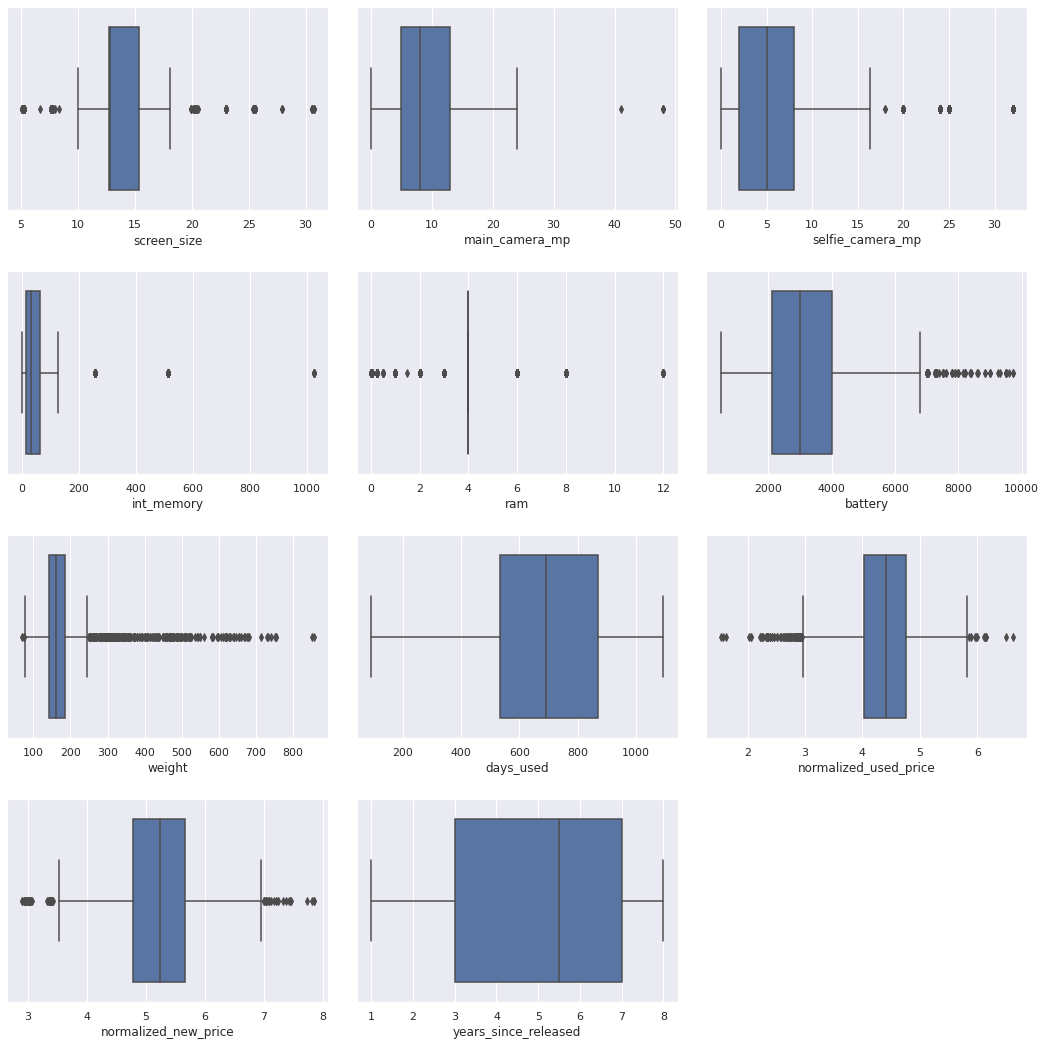

In [58]:
# outlier detection 
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

There are quite a few outliers in the data. However, it is not necessary to treat them as if they are proper values

### Preparing for data for modeling

In [59]:
#Seperating normalized_used_price from independent variables and creating a var with just normalized_used_price as the dependant var so we can train the data
x = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

print(x.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_released  
0              4.715100                     1  
1              5.519018                     1  
2              5.884631                     1  
3             

In [60]:
#print the first few lines of the y var
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [61]:
#add the intercept to data
X = sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [63]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [64]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [65]:
#fit OLS model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                           18:35:47   Log-Likelihood:                 124.22
No. Observations:                   2417   AIC:                            -150.4
Df Residuals:                       2368   BIC:                             133.3
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


There is a few p - values rejecting the null


## Model Performance Check

In [66]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [67]:
#Train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229849,0.180336,0.844933,0.841723,4.326958


In [68]:
#Train set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229849,0.180336,0.844933,0.841723,4.326958


The training  R2  is 0.84, so the model is not underfitting

The train and test RMSE and MAE are comparable, so the model is not overfitting either

MAE suggests that the model can predict anime ratings within a mean error of 0.18 on the test data

MAPE of 4.32 on the test data means that we are able to predict within 4% 


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

TEST FOR MULTICOLLINEARITY

REMOVING MULTICOLLINEARITY

Dropping high p-value variables

Test for linearity and Indepenence

Test for normality



Test for Homoscedasticity

### TEST FOR MULTICOLLINEARITY


In [69]:
#test for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
# calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [70]:
#checking VIF on train data
checking_vif(x_train) 

,feature,VIF
0,const,228.603553
1,screen_size,7.680705
2,main_camera_mp,2.136597
3,selfie_camera_mp,2.808416
4,int_memory,1.361465
5,ram,2.258272
6,battery,4.073582
7,weight,6.380746
8,days_used,2.669393
9,normalized_new_price,3.121941


*  There is multiple columns
 with high VIF values indicating there is a high multicolinearity

*  we will drop any high VIF that is higher then 5

### Removing Multicollinearity 

In [71]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [72]:
#specify the columns with high VIF
col_list = ["os_iOS","brand_name_Samsung","brand_name_Others","brand_name_Huawei","brand_name_Apple","weight",'screen_size'] 
#
res = treating_multicollinearity(x_train, y_train, col_list) 

res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841856,0.232166
1,brand_name_Huawei,0.841855,0.232167
2,brand_name_Others,0.841854,0.232167
3,os_iOS,0.841846,0.232173
4,brand_name_Samsung,0.841819,0.232193
5,screen_size,0.838448,0.234655
6,weight,0.838179,0.234849


In [73]:
col_to_drop ="brand_name_Apple"
x_train = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 
x_test = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 


vif = checking_vif(x_train)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,228.138041
1,screen_size,7.646967
2,main_camera_mp,2.135666
3,selfie_camera_mp,2.787127
4,int_memory,1.361451
5,ram,2.250072
6,battery,4.071593
7,weight,6.378178
8,days_used,2.668859
9,normalized_new_price,3.105535


In [74]:
#specify the columns with high VIF
col_list = ["brand_name_Samsung","brand_name_Others","brand_name_Huawei",'screen_size']

res = treating_multicollinearity(x_train, y_train, col_list) 

res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.841921,0.232118
1,brand_name_Others,0.841921,0.232118
2,brand_name_Samsung,0.841885,0.232145
3,screen_size,0.838505,0.234613


In [75]:
col_to_drop ="brand_name_Huawei"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 
x_test2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 


vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,168.522003
1,screen_size,7.634423
2,main_camera_mp,2.134683
3,selfie_camera_mp,2.777270
4,int_memory,1.359692
5,ram,2.249304
6,battery,4.071097
7,weight,6.377196
8,days_used,2.668291
9,normalized_new_price,3.104988


In [76]:
#specify the columns with high VIF
col_list = ["screen_size","weight"]

res = treating_multicollinearity(x_train, y_train, col_list) 

res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838505,0.234613
1,weight,0.838244,0.234802


In [77]:
col_to_drop ="screen_size"
x_train3 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 
x_test3 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 


vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  screen_size


,feature,VIF
0,const,168.522003
1,screen_size,7.634423
2,main_camera_mp,2.134683
3,selfie_camera_mp,2.777270
4,int_memory,1.359692
5,ram,2.249304
6,battery,4.071097
7,weight,6.377196
8,days_used,2.668291
9,normalized_new_price,3.104988


In [78]:
#specify the columns with high VIF
col_list = ["weight"]

res = treating_multicollinearity(x_train, y_train, col_list) 

res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.838244,0.234802


In [79]:
col_to_drop ="weight"
x_train3 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 
x_test3 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 


vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,168.522003
1,screen_size,7.634423
2,main_camera_mp,2.134683
3,selfie_camera_mp,2.777270
4,int_memory,1.359692
5,ram,2.249304
6,battery,4.071097
7,weight,6.377196
8,days_used,2.668291
9,normalized_new_price,3.104988


### Dropping high p-value variable

In [80]:
# initial list of columns
predictors = x_train2.copy()  
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'normalized_new_price', 'years_since_released', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Realme', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [81]:
x_train3 = x_train[selected_features]  
x_test3 = x_train[selected_features]


In [82]:
#fit OLS()
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     918.5
Date:                   Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                           18:35:51   Log-Likelihood:                 106.20
No. Observations:                   2417   AIC:                            -182.4
Df Residuals:                       2402   BIC:                            -95.55
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

The p values are good, they are all under .05


In [83]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train) 
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231569,0.181583,0.842603,0.84162,4.35553


In [84]:
# checking model performance on train set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_train3, y_train)

Test Performance



* The training R2 is around 84, so the model is not underfitting
* The train and test RMSE and MAE are comparable, so the model is not overfitting either
* MAE suggests that the model can predict anime ratings within a mean error of 0.18 on the test data
* MAPE of 4.32 on the test data means that we are able to predict within 4% 


### TEST FOR LINEARITY AND INDEPENDENCE


In [85]:
#reate a dataframe with  fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855637,0.231851
1525,4.448399,4.627645,-0.179246
1128,4.315353,4.281712,0.033640
3003,4.282068,4.238675,0.043393
2907,4.456438,4.474552,-0.018114


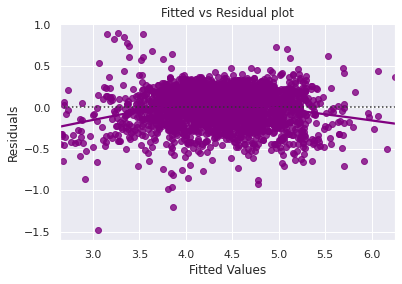

In [86]:
#plot the fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

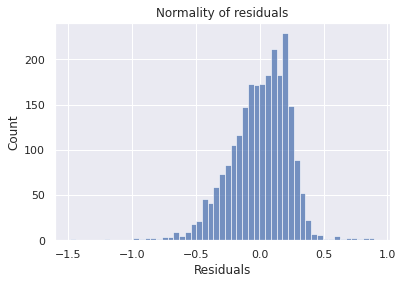

In [87]:
#plot the distribution of residuals
sns.histplot(data=df_pred, x="Residuals") 
plt.title("Normality of residuals")
plt.show()

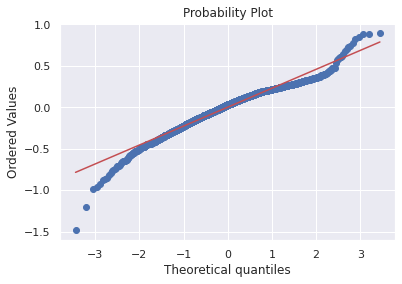

In [88]:
#the residuals more or less follow a straight line except for the tails
#heck Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The histogram of residuals does have a bell shape.

In [89]:
#apply the Shapiro-Wilks test
stats.shapiro(df_pred["Residuals"])

(0.9692835807800293, 2.4805272994260964e-22)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
 the residuals are not normal.
However, as an approximation, we can accept this distribution as close to being normal.


### TEST FOR HOMOSCEDASTICITY

In [90]:
# train data to apply the Goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3) 
lzip(name, test)

[('F statistic', 1.0491450075063873), ('p-value', 0.20369231172349372)]

* Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model

In [91]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     918.5
Date:                   Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                           18:35:52   Log-Likelihood:                 106.20
No. Observations:                   2417   AIC:                            -182.4
Df Residuals:                       2402   BIC:                            -95.55
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [92]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train) 
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231569,0.181583,0.842603,0.84162,4.35553


In [93]:
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train) 
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231569,0.181583,0.842603,0.84162,4.35553


* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.35% 

* Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

- 1.	The model is able to explain  4.35% of the used price prediction which is good.
This indicates that the model for predictions as well as inference purposes 

* 2.	If the screen size increases by one unit, then the price will  increases by 0.0254 units, all other variables held constant
* 3.	If the main camera MP  increases by one unit, then the price will increases by 0.0207 units, all other variables held constant
* 4.	If the number of years a phone been released increases by one unit, then its price will decreases by 0.0222 units, all other variables held constant
* 5.	ReCell should seek more used phones that are recent to sell since those are ones who priced more
* 6 .	ReCell can look to increase the number of phones with better back and selfie camera as the features most seek for 



___